In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [2]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [3]:
data_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/DIC/DIC_Baseline_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 100))

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [4]:
data_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/DIC/DIC_OAE_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 100))

### EU Average of DIC

In [5]:
data_baseline = data_baseline.where(data_baseline)
data_oae = data_oae.where(data_oae)

In [6]:
sliced_frame_baseline = data_baseline.sel(time_counter=slice('2090', '2100'))

In [7]:
sliced_frame_oae = data_oae.sel(time_counter=slice('2090', '2100'))

In [8]:
data_baseline_plot = data_baseline.DIC.mean(dim=('y', 'x', 'deptht'))
data_oae_plot = data_oae.DIC.mean(dim=('y', 'x', 'deptht'))

In [9]:
data_baseline_plot = data_baseline_plot.to_dataset()
data_oae_plot = data_oae_plot.to_dataset()

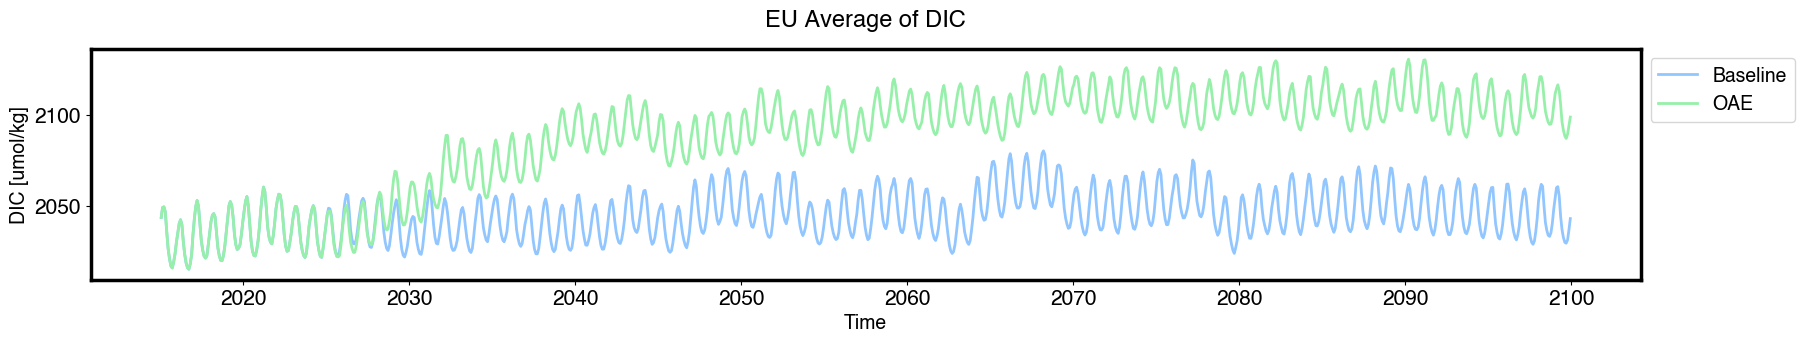

In [10]:
plt.figure(figsize=(20, 3))
plt.plot(data_baseline_plot.time_counter, data_baseline_plot.DIC, linewidth=2, label = 'Baseline')
plt.plot(data_oae_plot.time_counter, data_oae_plot.DIC, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Average of DIC', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

In [11]:
sliced_frame_baseline_plot = sliced_frame_baseline.DIC.mean(dim=('y', 'x', 'deptht'))
sliced_frame_oae_plot = sliced_frame_oae.DIC.mean(dim=('y', 'x', 'deptht'))

In [12]:
sliced_frame_baseline_plot = sliced_frame_baseline_plot.to_dataset()
sliced_frame_oae_plot = sliced_frame_oae_plot.to_dataset()

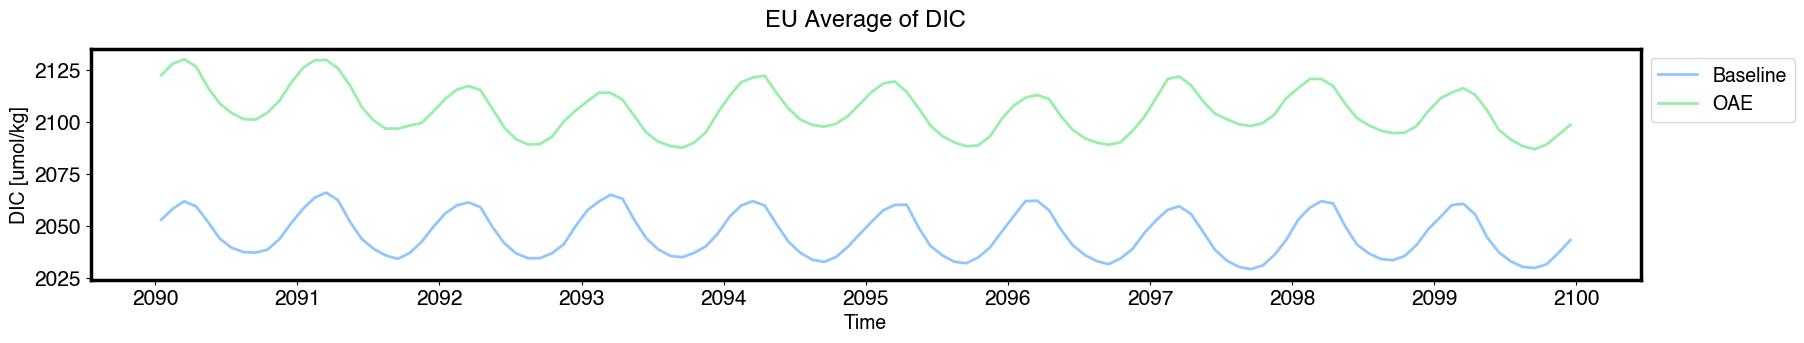

In [13]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.DIC, linewidth=2, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.DIC, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Average of DIC', fontsize=17, y=1.06)
plt.show()

### Unweighted EU Seasonal Average of DIC

In [14]:
start_date = "2090-01-01"
end_date = "2100-01-01"

dic_baseline = data_baseline["DIC"].sel(time_counter=slice(start_date, end_date))

In [15]:
dic_season_mean_all_years_baseline = dic_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True)
dic_seasonal_mean_baseline = dic_season_mean_all_years_baseline.mean(["y", "x", "deptht"])

In [16]:
start_date = "2090-01-01"
end_date = "2100-01-01"

dic_oae = data_oae["DIC"].sel(time_counter=slice(start_date, end_date))

In [17]:
dic_season_mean_all_years_oae = dic_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True)
dic_seasonal_mean_oae = dic_season_mean_all_years_oae.mean(["y", "x", "deptht"])

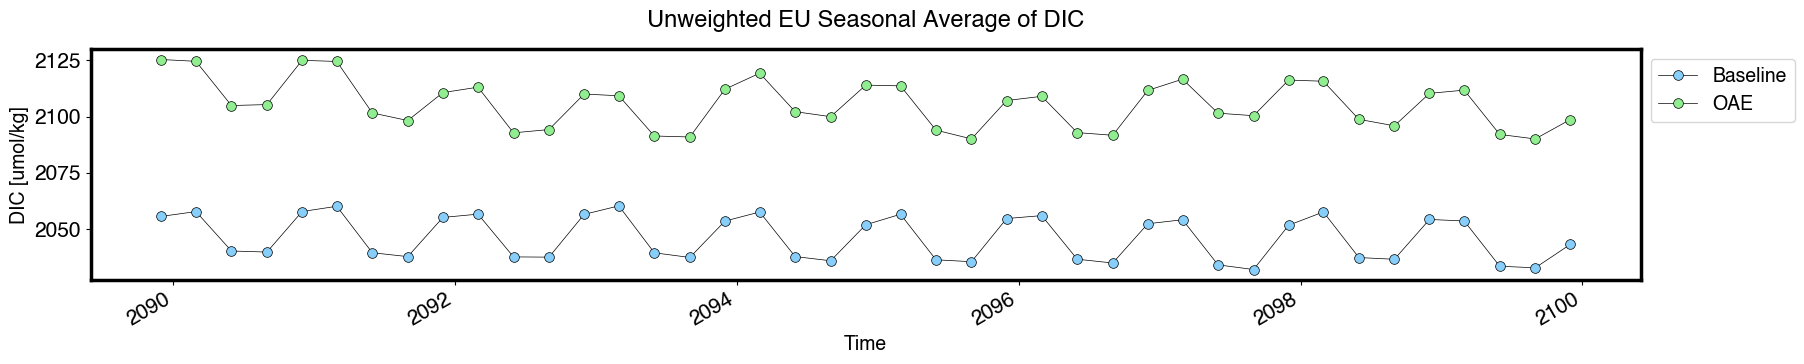

In [18]:
f, ax = plt.subplots(figsize=(20, 3))

dic_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

dic_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Seasonal Average of DIC", fontsize= 17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of DIC

In [19]:
month_length_baseline = dic_baseline.time_counter.dt.days_in_month
dic_weighted_mean_baseline = ((dic_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
dic_weighted_mean_baseline = dic_weighted_mean_baseline.where(dic_weighted_mean_baseline)
dic_weighted_season_baseline = dic_weighted_mean_baseline.mean(["y", "x", "deptht"])

In [20]:
month_length_oae = dic_oae.time_counter.dt.days_in_month
dic_weighted_mean_oae = ((dic_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
dic_weighted_mean_oae = dic_weighted_mean_oae.where(dic_weighted_mean_oae)
dic_weighted_season_oae = dic_weighted_mean_oae.mean(["y", "x", "deptht"])

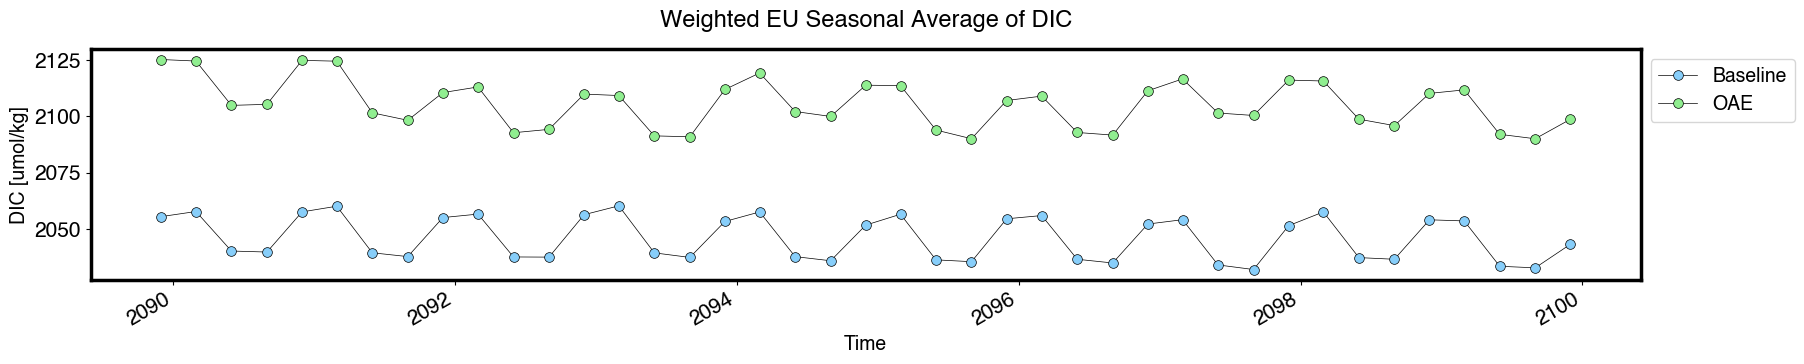

In [21]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(20, 3))
dic_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

dic_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted EU Seasonal Average of DIC", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of DIC (seasons displayed)

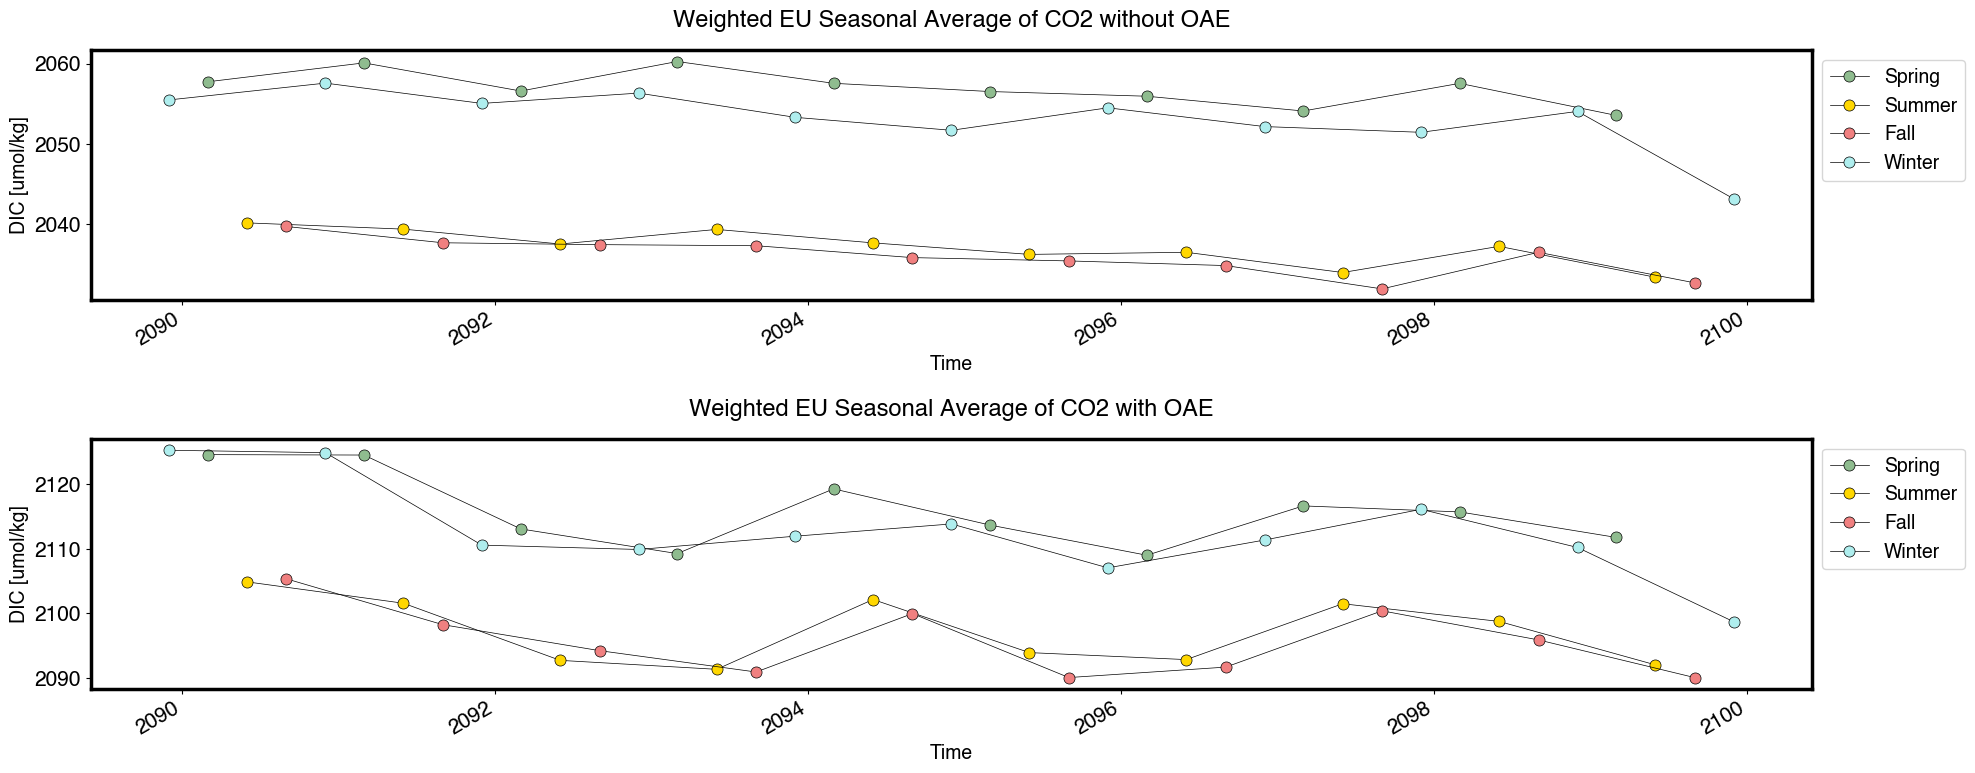

In [22]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in dic_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5, 
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted EU Seasonal Average of CO2 without OAE", fontsize=17, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('DIC [umol/kg]', fontsize=14)

for month, arr in dic_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5, 
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted EU Seasonal Average of CO2 with OAE", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('DIC [umol/kg]', fontsize=14)
f.tight_layout()
plt.show()

### Weighted EU Seasonal Average of DIC without OAE (seasons displayed)

In [23]:
dic_weighted_baseline = dic_weighted_season_baseline.to_dataframe('dic')
dic_weighted_baseline['Month'] = pd.DatetimeIndex(dic_weighted_baseline.index).month

In [24]:
conditions = [
    (dic_weighted_baseline['Month'] == 3),
    (dic_weighted_baseline['Month'] == 6),
    (dic_weighted_baseline['Month'] == 9),
    (dic_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

dic_weighted_baseline['Month'] = np.select(conditions, values)

In [25]:
colors = dict(zip(dic_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

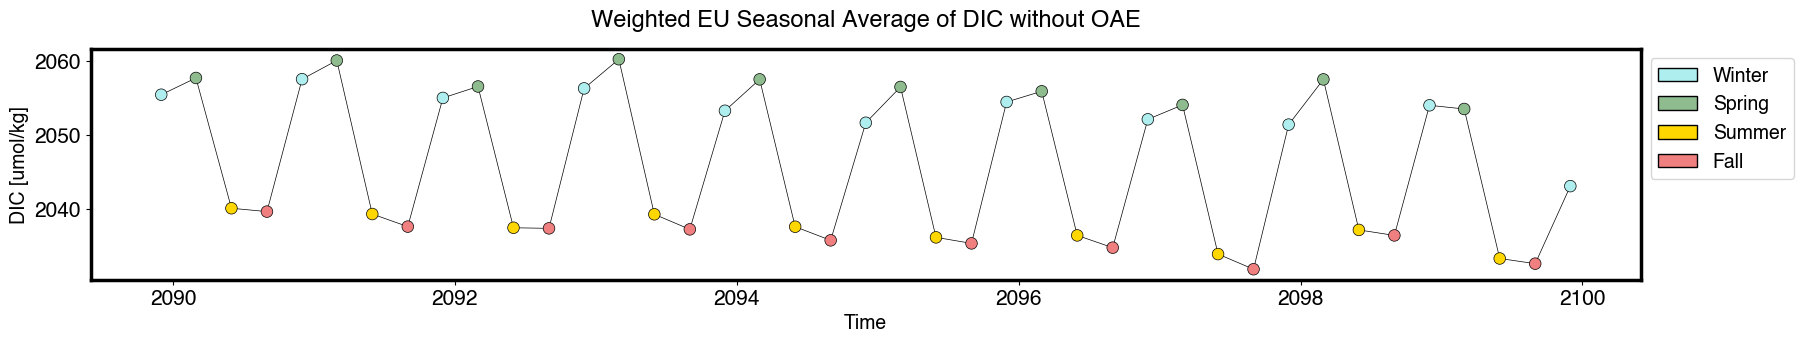

In [26]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(dic_weighted_baseline.index, dic_weighted_baseline.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(dic_weighted_baseline.index, dic_weighted_baseline.dic, color=dic_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC [umol/kg]', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of DIC without OAE", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of DIC with OAE (seasons displayed)

In [27]:
dic_weighted_oae = dic_weighted_season_oae.to_dataframe('dic')
dic_weighted_oae['Month'] = pd.DatetimeIndex(dic_weighted_oae.index).month

In [28]:
conditions = [
    (dic_weighted_oae['Month'] == 3),
    (dic_weighted_oae['Month'] == 6),
    (dic_weighted_oae['Month'] == 9),
    (dic_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

dic_weighted_oae['Month'] = np.select(conditions, values)

In [29]:
colors = dict(zip(dic_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

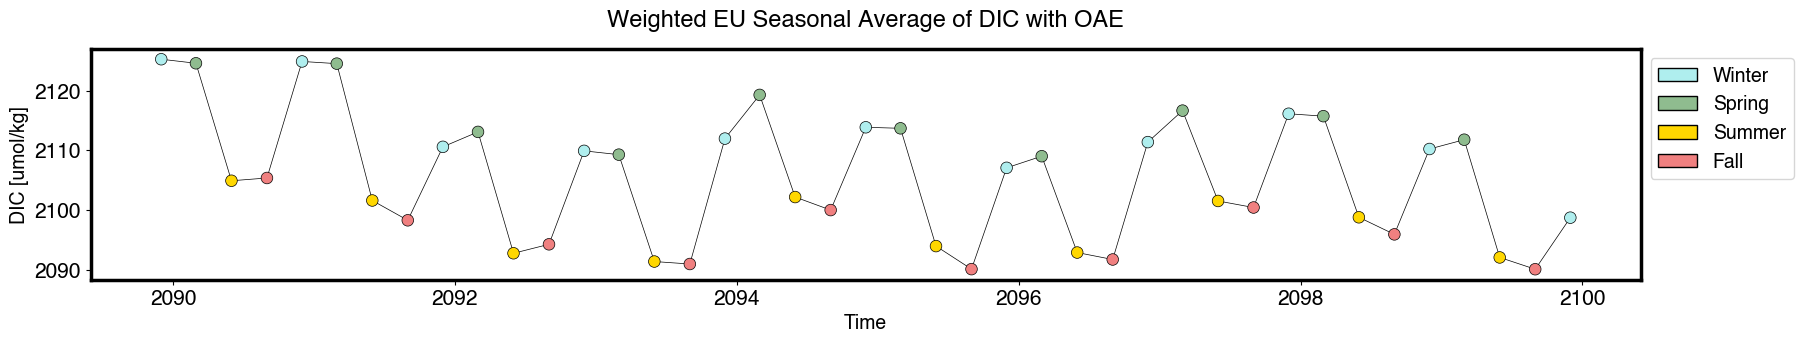

In [30]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(dic_weighted_oae.index, dic_weighted_oae.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(dic_weighted_oae.index, dic_weighted_oae.dic, color=dic_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC [umol/kg]', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of DIC with OAE", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of DIC (seasons displayed)

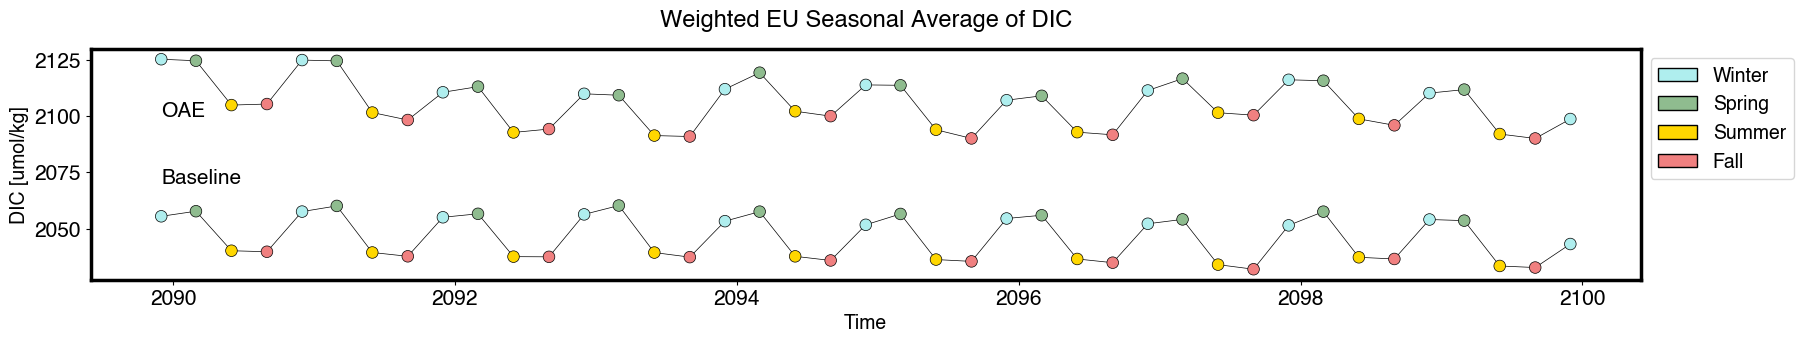

In [31]:
colors = dict(zip(dic_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(dic_weighted_baseline.index, dic_weighted_baseline.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43800, 2100, s='OAE')
ax.scatter(dic_weighted_baseline.index, dic_weighted_baseline.dic, color=dic_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

ax.plot_date(dic_weighted_oae.index, dic_weighted_oae.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43800, 2070, s='Baseline')
ax.scatter(dic_weighted_oae.index, dic_weighted_oae.dic, color=dic_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC [umol/kg]', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of DIC", fontsize=17, y=1.06)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/DIC/figs/EUDIC_seasonal_mean.png')

pass

### EU Monthly Averaged dic for the last 10 years

In [32]:
mean_baseline = (sliced_frame_baseline.DIC.mean(dim=('y', 'x', 'deptht'))).to_dataframe()
mean_baseline = mean_baseline.groupby(mean_baseline.index.month).DIC.mean()
mean_baseline = mean_baseline.reset_index()
mean_baseline['time_counter'] = mean_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_baseline = mean_baseline.set_index('time_counter')

In [33]:
mean_oae = (sliced_frame_oae.DIC.mean(dim=('y', 'x', 'deptht'))).to_dataframe()
mean_oae = mean_oae.groupby(mean_oae.index.month).DIC.mean()
mean_oae = mean_oae.reset_index()
mean_oae['time_counter']= mean_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_oae = mean_oae.set_index('time_counter')

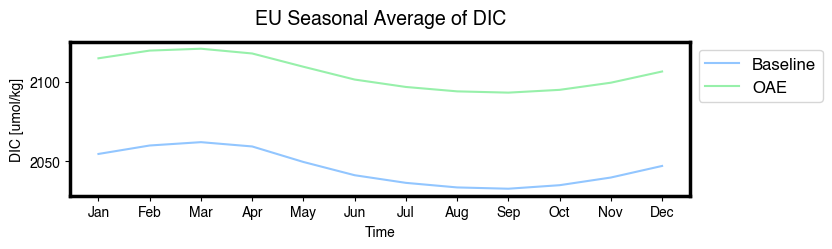

In [34]:
plt.figure(figsize=(8,2))
plt.plot(mean_baseline.DIC, label='Baseline')
plt.plot(mean_oae.DIC, label='OAE')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.xlabel("Time", fontsize=10)
plt.ylabel("DIC [umol/kg]", fontsize=10)
plt.xticks(fontsize=10, fontname="Helvetica")
plt.yticks(fontsize=10, fontname="Helvetica")
plt.title('EU Seasonal Average of DIC', fontname="Helvetica", fontsize=14, y=1.06)
plt.show()

### EU Seasonal Average of DIC from 2090 to 2100 without OAE

In [35]:
sliced_frame_baseline = sliced_frame_baseline.DIC.mean(dim=('deptht'))

In [36]:
month_length = sliced_frame_baseline.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_baseline = (sliced_frame_baseline * weights).groupby("time_counter.season").sum(dim="time_counter")

In [37]:
ds_unweighted_baseline = sliced_frame_baseline.groupby("time_counter.season").mean("time_counter")
ds_diff_baseline = ds_weighted_baseline - ds_unweighted_baseline

In [38]:
ds_weighted_baseline = ds_weighted_baseline.to_dataset(name='dic')
ds_unweighted_baseline = ds_unweighted_baseline.to_dataset(name='dic')
ds_diff_baseline = ds_diff_baseline.to_dataset(name='dic')

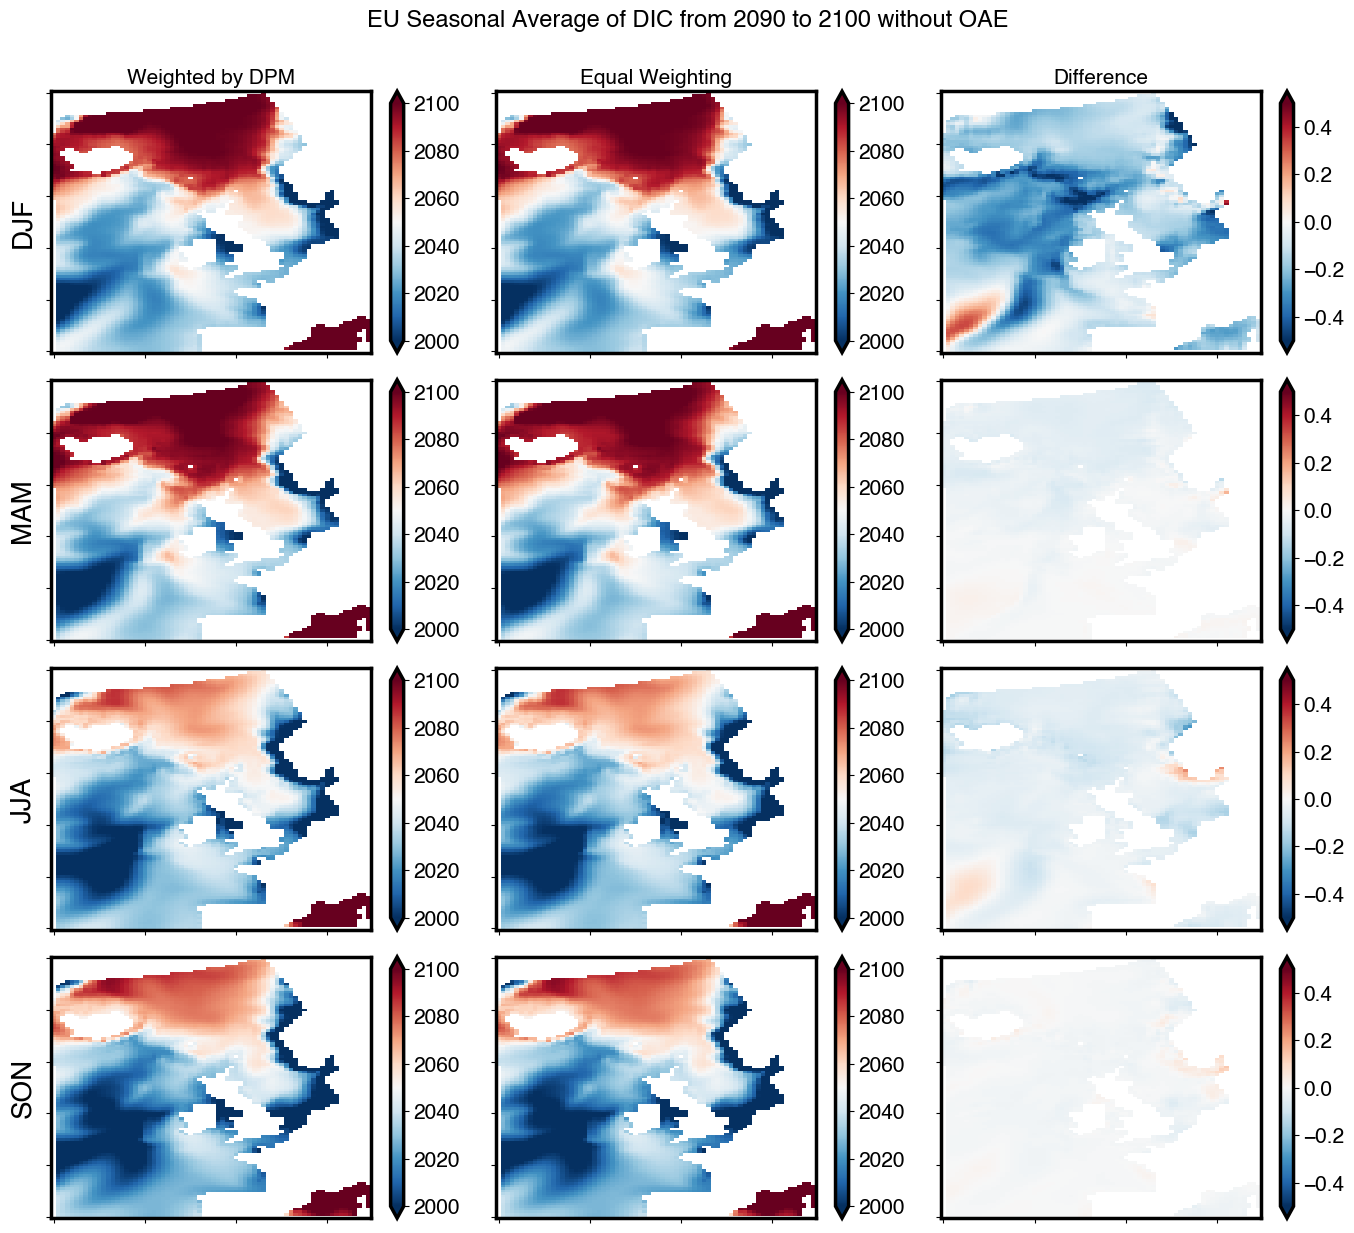

In [39]:
notnull = pd.notnull(ds_unweighted_baseline["dic"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_baseline["dic"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=2000,
        vmax=2100,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_baseline["dic"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=2000,
        vmax=2100,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_baseline["dic"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of DIC from 2090 to 2100 without OAE", fontsize=17, y=1.03)

pass

### EU Seasonal Average of DIC from 2090 to 2100 with OAE

In [40]:
sliced_frame_oae = sliced_frame_oae.DIC.mean(dim=('deptht'))

In [41]:
month_length = sliced_frame_oae.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_oae = (sliced_frame_oae * weights).groupby("time_counter.season").sum(dim="time_counter")

In [42]:
ds_unweighted_oae = sliced_frame_oae.groupby("time_counter.season").mean("time_counter")
ds_diff_oae = ds_weighted_oae - ds_unweighted_oae

In [43]:
ds_weighted_oae = ds_weighted_oae.to_dataset(name='dic')
ds_unweighted_oae = ds_unweighted_oae.to_dataset(name='dic')
ds_diff_oae = ds_diff_oae.to_dataset(name='dic')

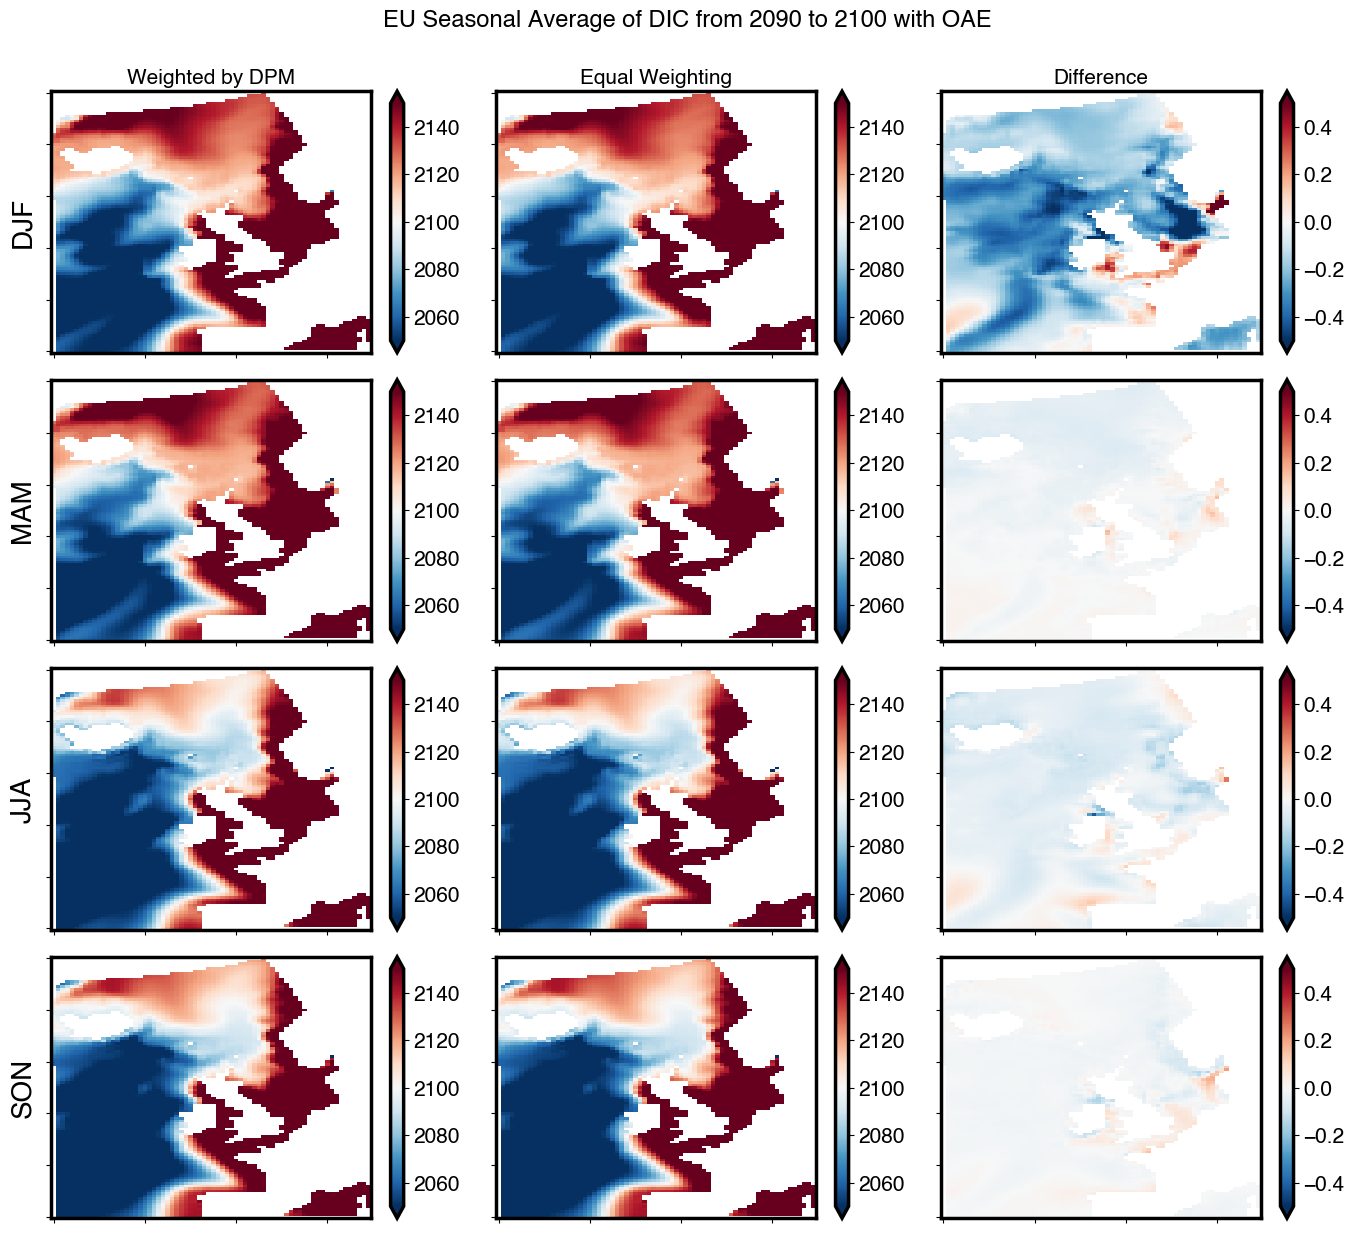

In [44]:
notnull = pd.notnull(ds_unweighted_baseline["dic"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_oae["dic"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=2050,
        vmax=2150,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_oae["dic"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=2050,
        vmax=2150,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_oae["dic"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of DIC from 2090 to 2100 with OAE", fontsize=17, y=1.03)

pass

### EU Monthly Average of DIC from 2090 to 2100 without OAE

In [45]:
start_date_month = "2090-01-01"
end_date_month = "2100-01-01"

dic_baseline_month = data_baseline["DIC"].sel(time_counter=slice(start_date_month, end_date_month))
dic_monthly_mean_baseline = dic_baseline_month.mean(["y", "x", "deptht"])

In [46]:
dic_oae_month = data_oae["DIC"].sel(time_counter=slice(start_date_month, end_date_month))
dic_monthly_mean_oae = dic_oae_month.mean(["y", "x", "deptht"])

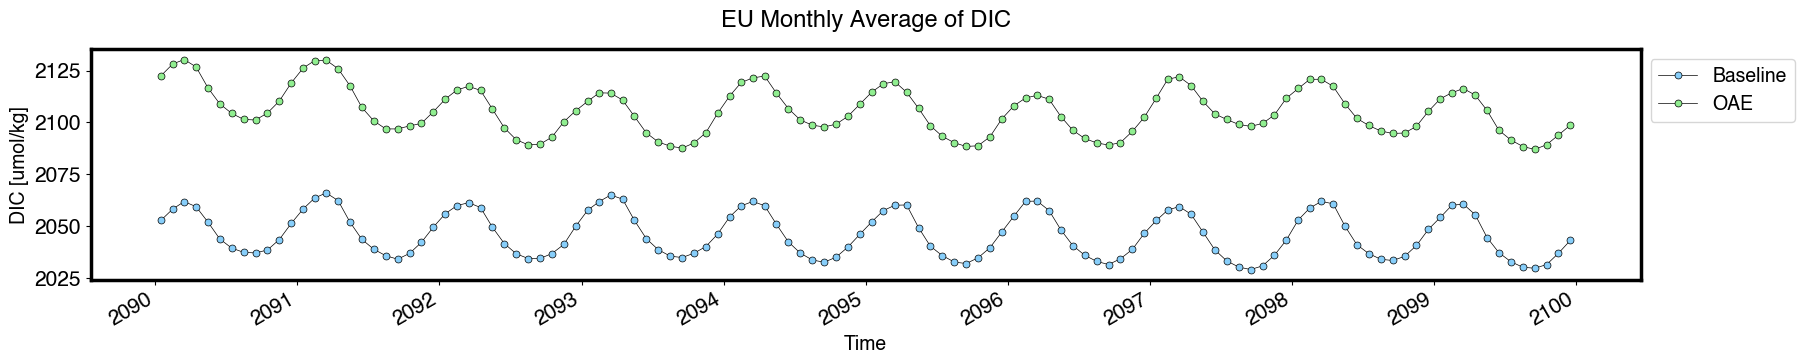

In [47]:
f, ax = plt.subplots(figsize=(20, 3))

dic_monthly_mean_baseline.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

dic_monthly_mean_oae.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("EU Monthly Average of DIC", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### EU Monthly Average of DIC from 2090 to 2100 without OAE

In [48]:
dic_baseline_monthly = dic_monthly_mean_baseline.to_dataframe('dic')
dic_baseline_monthly['Month'] = pd.DatetimeIndex(dic_baseline_monthly.index).month

In [49]:
conditions = [
    (dic_baseline_monthly['Month'] == 1),
    (dic_baseline_monthly['Month'] == 2),
    (dic_baseline_monthly['Month'] == 3),
    (dic_baseline_monthly['Month'] == 4),
    (dic_baseline_monthly['Month'] == 5),
    (dic_baseline_monthly['Month'] == 6),
    (dic_baseline_monthly['Month'] == 7),
    (dic_baseline_monthly['Month'] == 8),
    (dic_baseline_monthly['Month'] == 9),
    (dic_baseline_monthly['Month'] == 10),
    (dic_baseline_monthly['Month'] == 11),
    (dic_baseline_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

dic_baseline_monthly['Month'] = np.select(conditions, values)

In [50]:
colors = dict(zip(dic_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

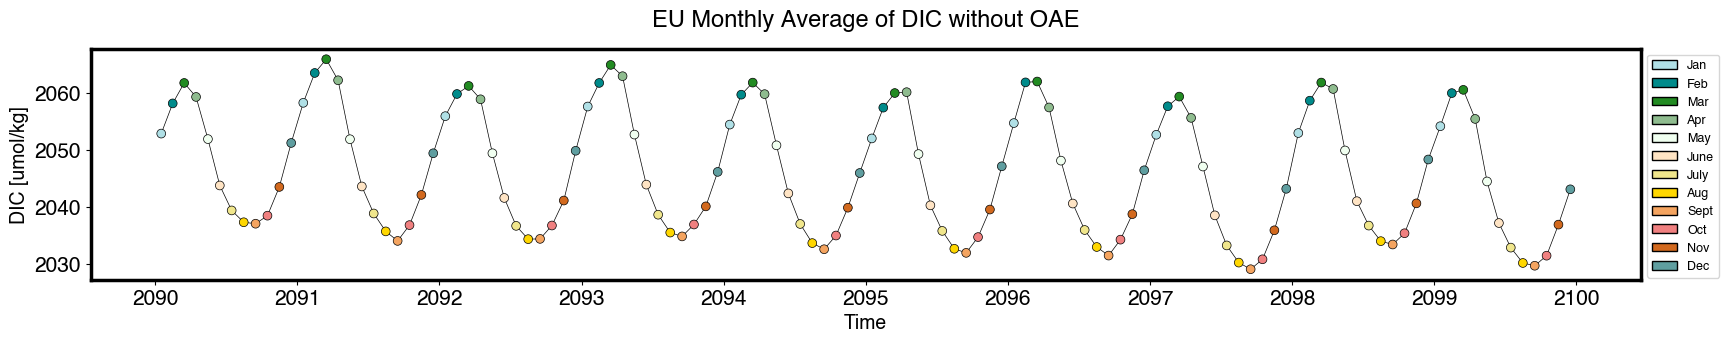

In [51]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(dic_baseline_monthly.index, dic_baseline_monthly.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(dic_baseline_monthly.index, dic_baseline_monthly.dic, color=dic_baseline_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC [umol/kg]', fontsize=14)
ax.set_title("EU Monthly Average of DIC without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of DIC from 2090 to 2100 with OAE

In [52]:
dic_oae_monthly = dic_monthly_mean_oae.to_dataframe('dic')
dic_oae_monthly['Month'] = pd.DatetimeIndex(dic_oae_monthly.index).month

In [53]:
conditions = [
    (dic_oae_monthly['Month'] == 1),
    (dic_oae_monthly['Month'] == 2),
    (dic_oae_monthly['Month'] == 3),
    (dic_oae_monthly['Month'] == 4),
    (dic_oae_monthly['Month'] == 5),
    (dic_oae_monthly['Month'] == 6),
    (dic_oae_monthly['Month'] == 7),
    (dic_oae_monthly['Month'] == 8),
    (dic_oae_monthly['Month'] == 9),
    (dic_oae_monthly['Month'] == 10),
    (dic_oae_monthly['Month'] == 11),
    (dic_oae_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

dic_oae_monthly['Month'] = np.select(conditions, values)

In [54]:
colors = dict(zip(dic_oae_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

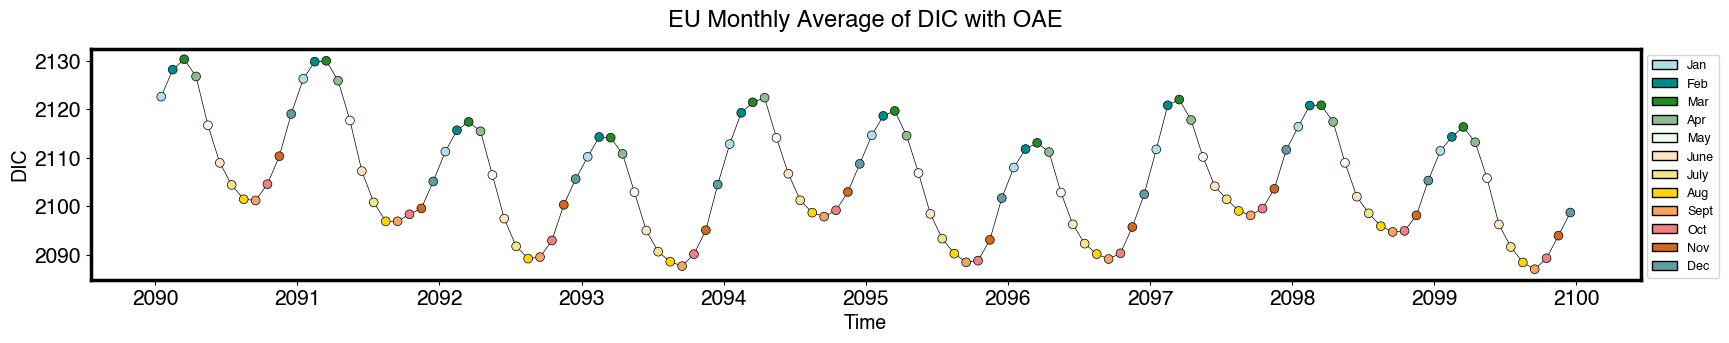

In [55]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(dic_oae_monthly.index, dic_oae_monthly.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(dic_oae_monthly.index, dic_oae_monthly.dic, color=dic_oae_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC', fontsize=14)
ax.set_title("EU Monthly Average of DIC with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of DIC from 2090 to 2100 with and without OAE

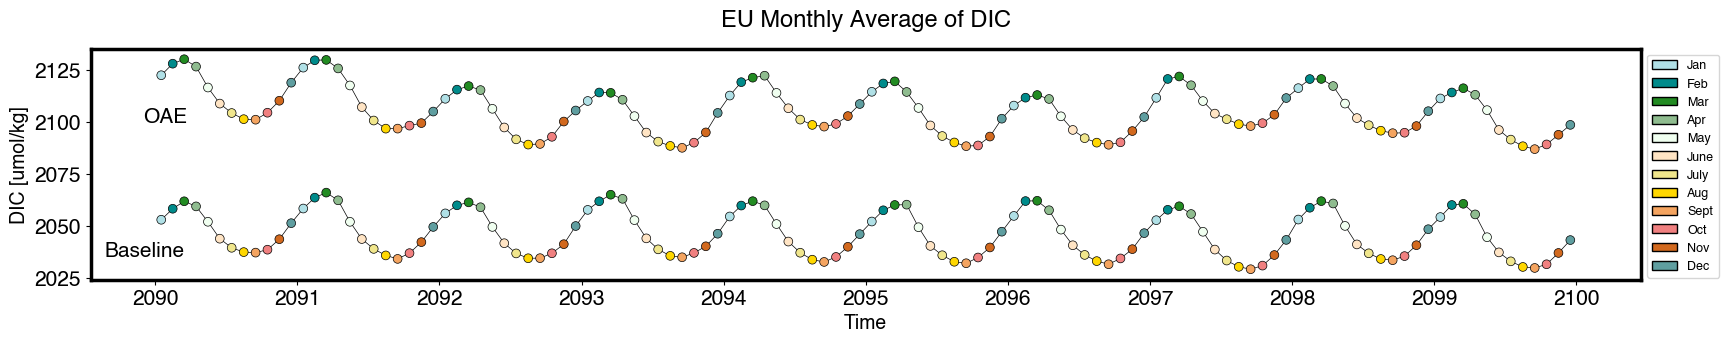

In [56]:
colors = dict(zip(dic_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(dic_baseline_monthly.index, dic_baseline_monthly.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43800, 2100, s='OAE')
ax.scatter(dic_baseline_monthly.index, dic_baseline_monthly.dic, color=dic_baseline_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(dic_oae_monthly.index, dic_oae_monthly.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43700, 2035, s='Baseline')
ax.scatter(dic_oae_monthly.index, dic_oae_monthly.dic, color=dic_oae_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC [umol/kg]', fontsize=14)
ax.set_title("EU Monthly Average of DIC", fontsize=17, y=1.06)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/DIC/figs/EUDIC_monthly_mean.png')

pass

### Δ DIC between Baseline and OAE

In [57]:
delta_dic = dic_oae_monthly.dic - dic_baseline_monthly.dic

In [58]:
delta_dic = delta_dic.to_xarray()

In [59]:
delta_dic = delta_dic.to_dataframe('dic')
delta_dic['Month'] = pd.DatetimeIndex(delta_dic.index).month

In [60]:
conditions = [
    (delta_dic['Month'] == 1),
    (delta_dic['Month'] == 2),
    (delta_dic['Month'] == 3),
    (delta_dic['Month'] == 4),
    (delta_dic['Month'] == 5),
    (delta_dic['Month'] == 6),
    (delta_dic['Month'] == 7),
    (delta_dic['Month'] == 8),
    (delta_dic['Month'] == 9),
    (delta_dic['Month'] == 10),
    (delta_dic['Month'] == 11),
    (delta_dic['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

delta_dic['Month'] = np.select(conditions, values)

In [61]:
colors = dict(zip(delta_dic.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

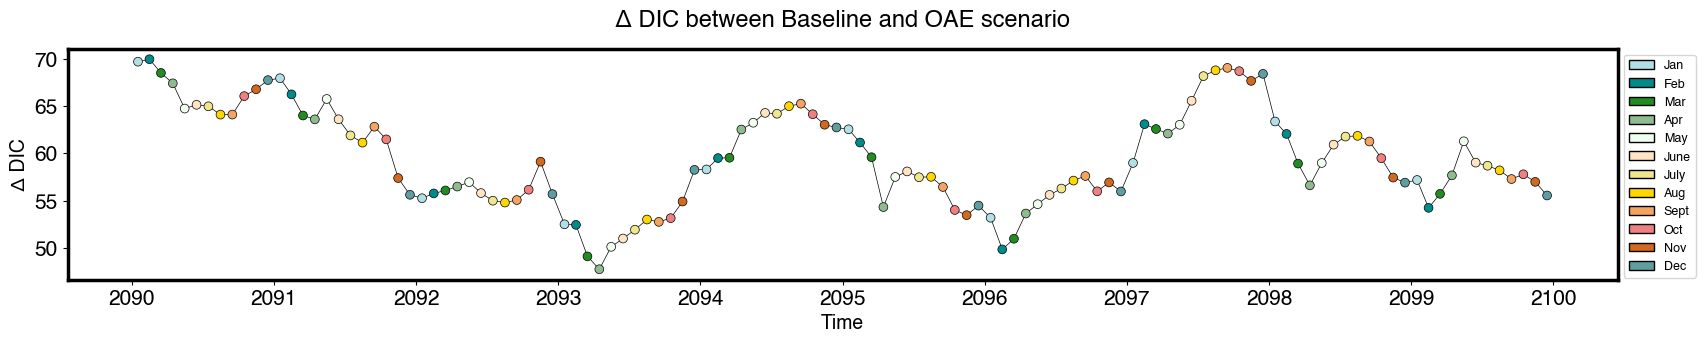

In [62]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(delta_dic.index, delta_dic.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_dic.index, delta_dic.dic, color=delta_dic.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Δ DIC', fontsize=14)
ax.set_title("Δ DIC between Baseline and OAE scenario", fontname="Helvetica", fontsize=17, y=1.06)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/DIC/figs/EUDIC_Δ_monthly_mean.png')

pass